In [27]:
# !pip install plotly

In [1]:
#Snowpark lib
from snowflake.snowpark import Session

# Data Science Libs
import numpy as np
import pandas as pd

# create_temp_table warning suppresion
import warnings; warnings.simplefilter('ignore')

#ConfigParser to read ini file
import configparser

config = configparser.ConfigParser()
config.read("/notebooks/notebooks/credentials.ini")

connection_parameters = {
    "user": f'{config["Snowflake"]["user"]}',
    "password": f'{config["Snowflake"]["password"]}',
    "account": f'{config["Snowflake"]["account"]}',
    "WAREHOUSE": f'{config["Snowflake"]["WAREHOUSE"]}',
    "DATABASE": f'{config["Snowflake"]["DATABASE"]}',
    "SCHEMA": f'{config["Snowflake"]["SCHEMA"]}'
}

def snowflake_connector(conn):
    try:
        session = Session.builder.configs(conn).create()
        print("connection successful!")
    except:
        raise ValueError("error while connecting with db")
    return session

session = snowflake_connector(connection_parameters)

connection successful!


In [2]:
# df = session.table("MEMBER_FUNDS_ENRICHED_DETAILS").to_pandas()
df = pd.read_csv("/data/funds.csv")

In [3]:
df.shape

(335999, 50)

In [4]:
# df.to_csv("/data/funds.csv", index=False)

In [5]:
df.head(20)

,MEMBER_ID,MEMBER_NAME,MEMBER_EMPLOYMENT,MEMBER_GENDER,MEMBER_CITY_TOWN,MEMBER_STATE,MEMBER_CONTACT_VERIFIED,FUND_ID,CHURN_REASON,LATITUDE,...,MEMBER_AGE,INVESTMENT_AGE_GROUP,RETIREMENT_AGE,RETIREMENT_AGE_GROUP,TOTAL_FUNDS_INVESTED,NO_OF_CHURN,MEMBER_DOB_DT,ALLOCATION_DT,CHURN_DT,RETIREMENT_DT
0,MID000001,Vallie Bachman,The University of Sydney,Female,Hobart,Tasmania,N,FID000106,NOT APPLICABLE,-42.8806,...,44,Middle-aged,21,MORE_THAN_10_YEAR,1,NaN,1980-01-08,2004-11-18,9999-12-31,2045-01-08
1,MID000028,Jani Herritt,Murdoch University,Female,Sydney,New South Wales,Y,FID000137,NOT APPLICABLE,-33.8678,...,52,Senior,13,MORE_THAN_10_YEAR,1,NaN,1972-02-27,2001-07-08,9999-12-31,2037-02-27
2,MID000044,Jani Rulapaugh,Torrens University Australia,Male,Melbourne,Victoria,Y,FID000050,NOT APPLICABLE,-37.8142,...,43,Middle-aged,22,MORE_THAN_10_YEAR,1,NaN,1981-02-17,2002-12-10,9999-12-31,2046-02-17
3,MID000089,Alease Hollack,University of New England,Male,Darwin,Northern Territory,N,FID000186,NOT APPLICABLE,-12.4381,...,43,Middle-aged,22,MORE_THAN_10_YEAR,1,NaN,1981-12-19,2002-08-13,9999-12-31,2046-12-19
4,MID000098,Devorah Whobrey,The University of Notre Dame Australia,Female,Darwin,Northern Territory,Y,FID000184,NOT APPLICABLE,-12.4381,...,59,Senior,6,IN_NEXT_5_YEAR,1,NaN,1965-12-07,2005-08-05,9999-12-31,2030-12-07
5,MID000108,Tawna Cantres,Deakin University,Male,Melbourne,Victoria,N,FID000154,NOT APPLICABLE,-37.8142,...,40,Middle-aged,25,MORE_THAN_10_YEAR,1,NaN,1984-01-08,2000-09-20,9999-12-31,2049-01-08
6,MID000141,Marguerita Foller,The University of Melbourne,Male,Hobart,Tasmania,Y,FID000153,NOT APPLICABLE,-42.8806,...,36,Middle-aged,29,MORE_THAN_10_YEAR,1,NaN,1988-08-25,2001-01-18,9999-12-31,2053-08-25
7,MID000165,Caitlin Lindall,Edith Cowan University,Female,Darwin,Northern Territory,Y,FID000042,NOT APPLICABLE,-12.4381,...,33,Middle-aged,32,MORE_THAN_10_YEAR,1,NaN,1991-11-03,2001-12-17,9999-12-31,2056-11-03
8,MID000169,Vi Merced,University of South Australia,Male,Adelaide,South Australia,N,FID000142,NOT APPLICABLE,-34.9275,...,25,Young,40,MORE_THAN_10_YEAR,1,NaN,1999-08-15,2001-04-28,9999-12-31,2064-08-15
9,MID000198,Sharika Blackwood,Curtin University,Female,Perth,Western Australia,N,FID000137,NOT APPLICABLE,-31.9559,...,59,Senior,6,IN_NEXT_5_YEAR,1,NaN,1965-07-27,2001-08-13,9999-12-31,2030-07-27


In [6]:
no_investments = dict(df.groupby("MEMBER_ID")["MEMBER_ID"].count())

In [17]:
# import plotly.express as px
# import plotly.offline as pyo
# # Set notebook mode to work in offline
# pyo.init_notebook_mode()
import matplotlib.pyplot as plt
import numpy as np

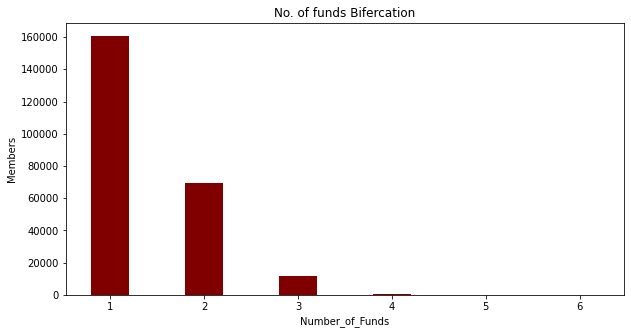

In [19]:
# cat = list(set(list(no_investments.values())))
# val = [list(no_investments.values()).count(i) for i in cat]
# temp = pd.DataFrame({"Number_of_Funds": cat, "Members": val})
# fig = px.bar(temp, x='Number_of_Funds', y='Members')
# fig.show()

fig = plt.figure(figsize = (10, 5))

plt.bar(cat, val, color ='maroon', 
        width = 0.4)

plt.xlabel("Number_of_Funds")
plt.ylabel("Members")
plt.title("No. of funds Bifercation")
plt.show()

In [9]:
list(no_investments.values()).count(1)

160656

In [23]:
df.columns

Index(['MEMBER_ID', 'MEMBER_NAME', 'MEMBER_EMPLOYMENT', 'MEMBER_GENDER',
       'MEMBER_CITY_TOWN', 'MEMBER_STATE', 'MEMBER_CONTACT_VERIFIED',
       'FUND_ID', 'CHURN_REASON', 'LATITUDE', 'LONGITUDE', 'COUNTRY',
       'COUNTRYCODE', 'CAPITAL', 'POPULATION', 'FUND_TOTAL_ASSETS',
       'FUND_RETURN_TARGET_PERCENTAGE', 'INVESTMENT_RISK_LEVEL',
       'INVESTMENT_RISK_CATEGORY', 'CASH_BENCHMARK_ALLOCATION',
       'FIXED_INCOME_BENCHMARK_ALLOCATION',
       'DOMESTIC_LISTED_EQUITY_BENCHMARK_ALLOCATION',
       'INTERNATIONAL_LISTED_EQUITY_BENCHMARK_ALLOCATION',
       'UNLISTED_EQUITY_BENCHMARK_ALLOCATION', 'EQUITY_BENCHMARK_ALLOCATION',
       'PROPERTY_BENCHMARK_ALLOCATION', 'INFRA_BENCHMARK_ALLOCATION',
       'COMMODITIES_BENCHMARK_ALLOCATION', 'OTHERS_BENCHMARK_ALLOCATION',
       'FUND_RISK_LEVEL', 'FUND_RISK_CATEGORY',
       'NEG_NETRETURN_SINCE_INCEPTION', 'YEAR_1_RETURNS', 'YEAR_3_RETURNS',
       'YEAR_5_RETURNS', 'YEAR_7_RETURNS', 'YEAR_10_RETURNS', 'SUPER_FEES',
       'PEN